<a href="https://colab.research.google.com/github/atarax-ia/VIU_03_Alg_Optimizacion/blob/main/AG2/Algoritmos_Javier_Rodriguez_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 2
# Javier Rodríguez Juárez

[Link a Github](https://github.com/atarax-ia/VIU_03_Alg_Optimizacion/tree/main/AG2)

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = lambda X: X[0]**2 + X[1]**2    # Función
df = lambda X: [2 * X[0], 2 * X[1]] # Gradiente

Solución =  [-2.163226464353566e-23, -9.98209407469802e-24] 5.6759707572408436e-46


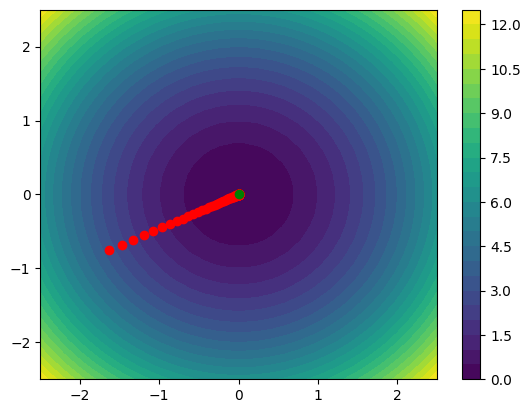

In [3]:
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x, y])

contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]

plt.plot(P[0], P[1], "o", c="red")

ta = 0.05

for _ in range(500):
  grad = df(P)
  P[0], P[1] = P[0] - ta * grad[0], P[1] - ta * grad[1]
  plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "o", c="green")
print("Solución = ", P, f(P))

Para una función:

$ f(x, y) = \sin \left(\frac{1}{2} x^{2} - \frac{1}{4} y^{2} + 3 \right) \cdot \cos \left(2 x + 1 - \mathrm{e}^{y} \right) $

In [4]:
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])

def df(pto):
    h = 0.01
    T = np.copy(pto)
    grad = np.zeros(2)
    for it, th in enumerate(pto):
        T[it] = T[it] + h
        grad[it] = (f(T) - f(pto)) / h
    return grad

## Aplicando la definición de derivada


$ f'(a) = \lim_{h \to 0} \frac{f(a + h) - f(a)}{h} $


*Partiremos siempre del punto inicial (0, 0) para que los resultados sean comparables*

Con una tasa de aprendizaje de $\gamma = 0.05$ y 500 iteraciones:

Solución =  [2.1862558022902987, 1.679703727336733] -0.9995748020012025


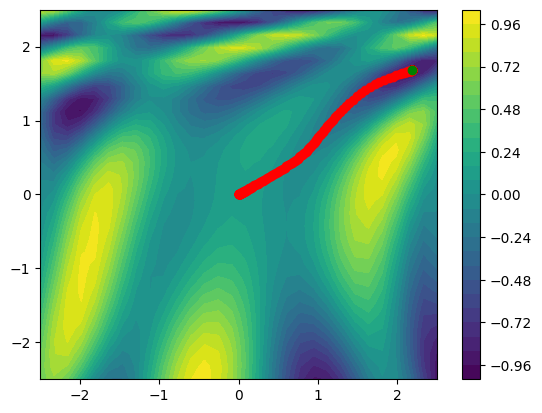

In [5]:
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x, y])

contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

# P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
P = [0, 0]

plt.plot(P[0], P[1], "o", c="red")

ta = 0.05

for _ in range(500):
  grad = df(P)
  P[0], P[1] = P[0] - ta * grad[0], P[1] - ta * grad[1]
  plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "o", c="green")
print("Solución = ", P, f(P))

Aplicando una tasa de aprendizaje variable en función del gradiente:

Solución =  [2.186255802290299, 1.6797037273367328] -0.9995748020012026


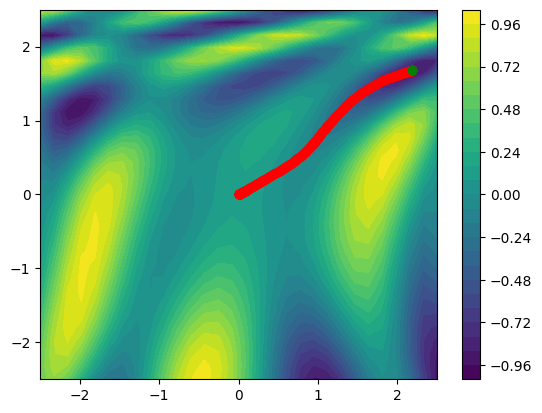

In [6]:
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x, y])

contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

# P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
P = [0, 0]

plt.plot(P[0], P[1], "o", c="red")

ta = 0.05

grad_ini = df(P)
grad_prev = math.sqrt(grad_ini[0]**2 + grad_ini[1]**2)

steps = 500
for s in range(steps):
  grad = df(P)
  P[0], P[1] = P[0] - ta * grad[0], P[1] - ta * grad[1]
  plt.plot(P[0], P[1], "o", c="red")

  # Variacion en funcion del modulo del gradiente para adecuar
  # la tasa de aprendizaje en cada iteracion
  mod_grad = math.sqrt(grad[0]**2 + grad[1]**2)
  ta = ta * (1 - (mod_grad - grad_prev) / max(1, mod_grad + grad_prev))
  grad_prev = mod_grad


plt.plot(P[0], P[1], "o", c="green")
print("Solución = ", P, f(P))

Aplicando una tasa de aprendizaje variable en función del numero de iteraciones:


*Hay que incrementar la tasa de aprendizaje inicial hasta 0.25*

Solución =  [2.127532371869663, 1.6608790599779941] -0.9903407471475894


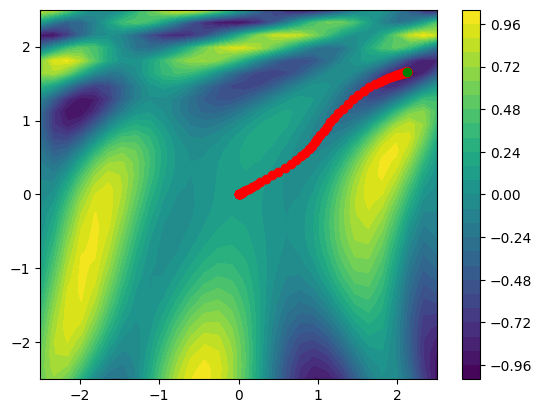

In [7]:
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x, y])

contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

# P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
P = [0, 0]

plt.plot(P[0], P[1], "o", c="red")

ta = 0.25

grad_ini = df(P)
grad_prev = math.sqrt(grad_ini[0]**2 + grad_ini[1]**2)

steps = 500
for s in range(steps):
  grad = df(P)
  P[0], P[1] = P[0] - ta * grad[0], P[1] - ta * grad[1]
  plt.plot(P[0], P[1], "o", c="red")

  # Variacion en funcion del numero de iteraciones
  mod_grad = math.sqrt(grad[0]**2 + grad[1]**2)
  ta = ta * (1 - s / steps)
  grad_prev = mod_grad


plt.plot(P[0], P[1], "o", c="green")
print("Solución = ", P, f(P))

## De forma analítica

Calculando la derivada:

$ \nabla f(x, y) = \left( \frac{\partial f(x, y)}{\partial x}, \frac{\partial f(x, y)}{\partial y}\right) $

- [$ \frac{\partial f(x, y)}{\partial x} = x \cdot \cos \left(2 x - \mathrm{e}^{y} + 1 \right) \cdot \cos \left(\frac{x^{2}}{2} - \frac{y^{2}}{4} + 3 \right) - 2 \cdot \sin \left(2 x - \mathrm{e}^{y} + 1 \right) \cdot \sin \left(\frac{x^{2}}{2} - \frac{y^{2}}{4} + 3\right) $](https://www.wolframalpha.com/input?i=Derivate%5Bsin%281%2F2+*+x%5E2+-+1%2F4+*+y%5E2+%2B+3%29+*+cos%282*x+%2B+1-+E%5Ey%29%2C+x%5D)

- [$ \frac{\partial f(x, y)}{\partial y} = \mathrm{e}^{y} \cdot \sin \left(2 x - \mathrm{e}^{y} + 1 \right) \cdot \sin \left(\frac{x^{2}}{2} - \frac{y^{2}}{4} + 3 \right) - \frac{1}{2} \cdot y \cdot \cos \left(2 x - \mathrm{e}^{y} + 1 \right) \cdot \cos \left(\frac{x^{2}}{2} - \frac{y^{2}}{4} + 3 \right) $](https://www.wolframalpha.com/input?i=Derivate%5Bsin%281%2F2+*+x%5E2+-+1%2F4+*+y%5E2+%2B+3%29+*+cos%282*x+%2B+1-+E%5Ey%29%2C+y%5D)

In [8]:
df = lambda X: \
         [X[0] * np.cos(2 * X[0] - np.e**X[1] + 1) * np.cos(X[0]**2 / 2 - X[1]**2 / 4 + 3) - 2 * np.sin(2 * X[0] - np.e**X[1] + 1) * np.sin(X[0]**2 / 2 - X[1]**2 / 4 + 3),\
         np.e**X[1] * np.sin(2 * X[0] - np.e**X[1] + 1) * np.sin(X[0]**2 / 2 - X[1]**2 / 4 + 3) - (1/2) * X[1] * np.cos(2 * X[0] - np.e**X[1] + 1) * np.cos(X[0]**2 / 2 - X[1]**2 / 4 + 3)]

Con una tasa de aprendizaje de $\gamma = 0.05$ y 500 iteraciones:

Solución =  [0.0, 0.0] 0.1411200080598672


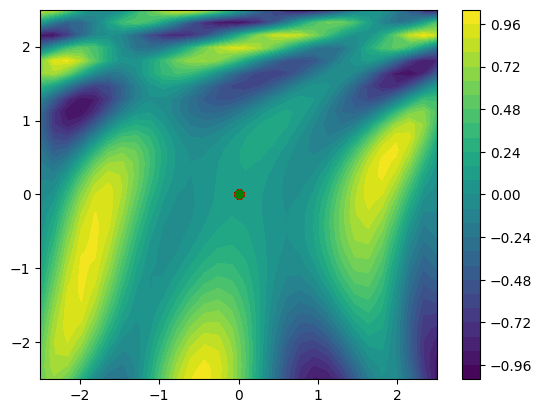

In [9]:
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x, y])

contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

# P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
P = [0, 0]

plt.plot(P[0], P[1], "o", c="red")

ta = 0.05

for _ in range(500):
  grad = df(P)
  P[0], P[1] = P[0] - ta * grad[0], P[1] - ta * grad[1]
  plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "o", c="green")
print("Solución = ", P, f(P))

Aplicando una tasa de aprendizaje variable en función del gradiente:

Solución =  [0.0, 0.0] 0.1411200080598672


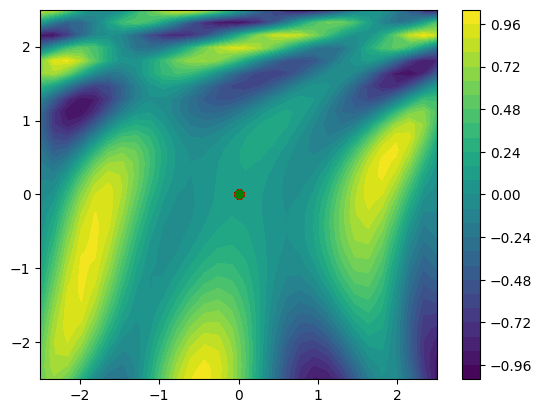

In [10]:
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x, y])

contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

# P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
P = [0, 0]

plt.plot(P[0], P[1], "o", c="red")

ta = 0.05

grad_ini = df(P)
grad_prev = math.sqrt(grad_ini[0]**2 + grad_ini[1]**2)

steps = 500
for s in range(steps):
  grad = df(P)
  P[0], P[1] = P[0] - ta * grad[0], P[1] - ta * grad[1]
  plt.plot(P[0], P[1], "o", c="red")

  # Variacion en funcion del modulo del gradiente para adecuar
  # la tasa de aprendizaje en cada iteracion
  mod_grad = math.sqrt(grad[0]**2 + grad[1]**2)
  ta = ta * (1 - (mod_grad - grad_prev) / max(1, mod_grad + grad_prev))
  grad_prev = mod_grad


plt.plot(P[0], P[1], "o", c="green")
print("Solución = ", P, f(P))

Aplicando una tasa de aprendizaje variable en función del numero de iteraciones:


*Hay que incrementar la tasa de aprendizaje inicial hasta 0.25*

Solución =  [0.0, 0.0] 0.1411200080598672


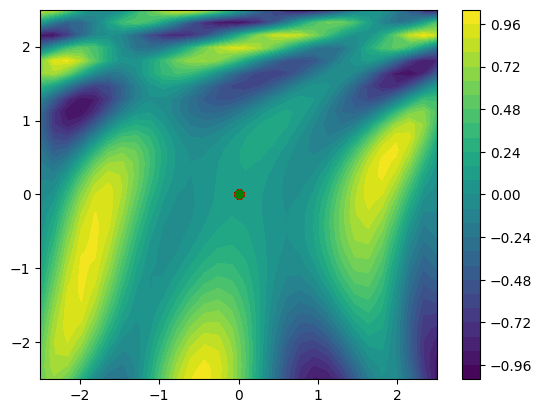

In [11]:
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x, y])

contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

# P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
P = [0, 0]

plt.plot(P[0], P[1], "o", c="red")

ta = 0.25

grad_ini = df(P)
grad_prev = math.sqrt(grad_ini[0]**2 + grad_ini[1]**2)

steps = 500
for s in range(steps):
  grad = df(P)
  P[0], P[1] = P[0] - ta * grad[0], P[1] - ta * grad[1]
  plt.plot(P[0], P[1], "o", c="red")

  # Variacion en funcion del numero de iteraciones
  mod_grad = math.sqrt(grad[0]**2 + grad[1]**2)
  ta = ta * (1 - s / steps)
  grad_prev = mod_grad


plt.plot(P[0], P[1], "o", c="green")
print("Solución = ", P, f(P))

Analíticamente, como el punto inicial es (0, 0) es un máximo local, el gradiente de la función en ese punto es nulo y no varia (permanece estable).

Realizando los mismos ejemplos para un punto inicial aleatorio:

Aplicando una tasa de aprendizaje variable en función del gradiente:

Solución =  [-0.8229073158984596, -0.4993775681849973] -0.041983264557007564


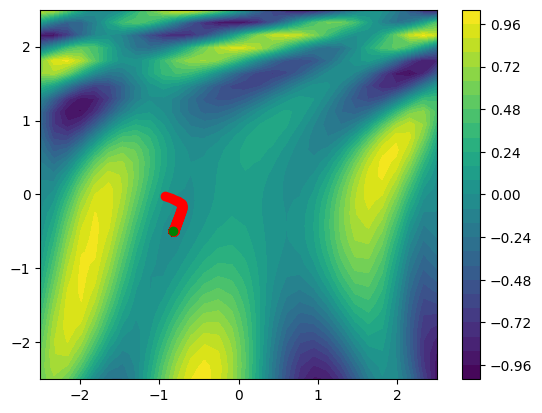

In [12]:
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x, y])

contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
# P = [0, 0]

plt.plot(P[0], P[1], "o", c="red")

ta = 0.05

grad_ini = df(P)
grad_prev = math.sqrt(grad_ini[0]**2 + grad_ini[1]**2)

steps = 500
for s in range(steps):
  grad = df(P)
  P[0], P[1] = P[0] - ta * grad[0], P[1] - ta * grad[1]
  plt.plot(P[0], P[1], "o", c="red")

  # Variacion en funcion del modulo del gradiente para adecuar
  # la tasa de aprendizaje en cada iteracion
  mod_grad = math.sqrt(grad[0]**2 + grad[1]**2)
  ta = ta * (1 - (mod_grad - grad_prev) / max(1, mod_grad + grad_prev))
  grad_prev = mod_grad


plt.plot(P[0], P[1], "o", c="green")
print("Solución = ", P, f(P))

Aplicando una tasa de aprendizaje variable en función del numero de iteraciones:


*Hay que incrementar la tasa de aprendizaje inicial hasta 0.25*

Solución =  [-2.026306094924716, 1.1728725802321565] -0.9999941910069718


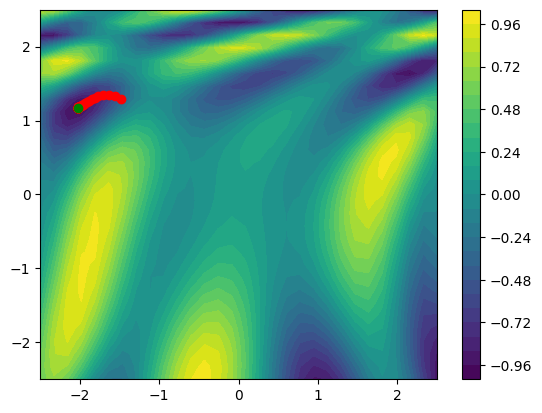

In [15]:
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy, ix] = f([x, y])

contour = plt.contourf(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

P = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
# P = [0, 0]

plt.plot(P[0], P[1], "o", c="red")

ta = 0.05

grad_ini = df(P)
grad_prev = math.sqrt(grad_ini[0]**2 + grad_ini[1]**2)

steps = 500
for s in range(steps):
  grad = df(P)
  P[0], P[1] = P[0] - ta * grad[0], P[1] - ta * grad[1]
  plt.plot(P[0], P[1], "o", c="red")

  # Variacion en funcion del numero de iteraciones
  mod_grad = math.sqrt(grad[0]**2 + grad[1]**2)
  ta = ta * (1 - s / steps)
  grad_prev = mod_grad


plt.plot(P[0], P[1], "o", c="green")
print("Solución = ", P, f(P))